# Support Vector Machines - Exercise 1

In this exercise, we'll be using support vector machines (SVMs) to build a spam classifier.  We'll start with SVMs on some simple 2D data sets to see how they work.  Then we'll do some pre-processing work on a set of raw emails and build a classifier on the processed emails using a SVM to determine if they are spam or not.

The first thing we're going to do is look at a simple 2-dimensional data set and see how a linear SVM works on the data set for varying values of C (similar to the regularization term in linear/logistic regression).  Let's load the data.
## Exercise 1
#### 1. Load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC


#### 2. Load data
Load the file *ejer_1_data1.mat*. Find the way for loading this kind of file. **scipy.io.loadmat**

In [2]:
mat = scipy.io.loadmat('./data/ejer_1_data1.mat')
mat.keys()


dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [3]:
mat['X']

51

In [6]:
mat['y']

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1]], dtype=uint8)

#### 3. Create a DataFrame with the features and target

In [7]:
data = np.hstack((mat['X'], mat['y']))
df = pd.DataFrame(data, columns= ['x1', 'x2', 'y'])
df.head()

,x1,x2,y
0,1.9643,4.5957,1.0
1,2.2753,3.8589,1.0
2,2.9781,4.5651,1.0
3,2.9320,3.5519,1.0
4,3.5772,2.8560,1.0


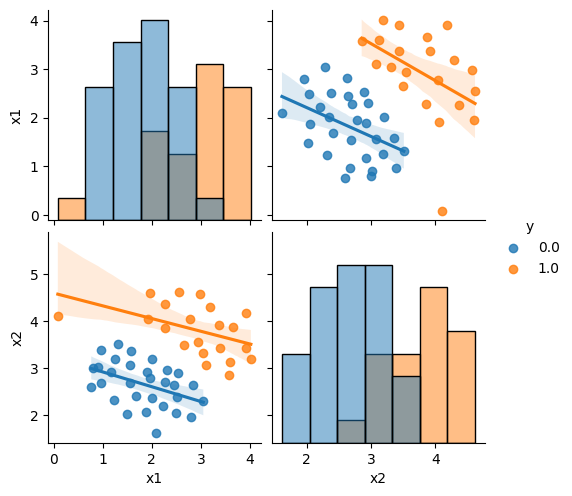

In [12]:
sns.pairplot(df, kind='reg', hue='y', diag_kind='hist');

<Axes: >

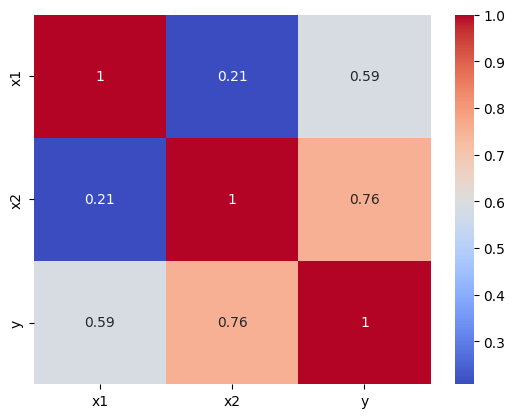

In [10]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

In [ ]:
# df = pd.DataFrame(mat.X, columns=['x1', 'x2']) # por separado
# df = pd.DataFrame(mat.y, columns=['y']) # por separado

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      51 non-null     float64
 1   x2      51 non-null     float64
 2   y       51 non-null     float64
dtypes: float64(3)
memory usage: 1.3 KB


In [8]:
df.describe()

,x1,x2,y
count,51.000000,51.000000,51.000000
mean,2.268780,3.132512,0.411765
std,0.928531,0.753256,0.497050
min,0.086405,1.617700,0.000000
25%,1.572550,2.636000,0.000000
50%,2.275300,3.070900,0.000000
75%,2.955050,3.531400,1.000000
max,4.015000,4.616200,1.000000


In [9]:
df.y.unique()

array([1., 0.])

#### 4. Plot a scatterplot with the data

<Axes: xlabel='x1', ylabel='x2'>

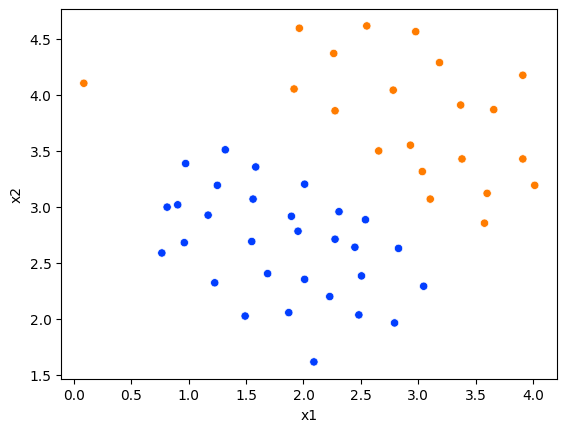

In [13]:
sns.scatterplot(data=df, x=df.x1, y=df.x2, hue='y',palette='bright', legend=False)

en este caso una linea es lo que mejor se ajusta y bastante bien. con KNN tmb podría pero ya que esta tan visible que se separa por linea.

Notice that there is one outlier positive example that sits apart from the others.  The classes are still linearly separable but it's a very tight fit.  We're going to train a linear support vector machine to learn the class boundary.

#### 5. LinearSVC
Declare a Linear SVC with the hyperparamenters:

```Python
LinearSVC(C=1, loss='hinge', max_iter=10000)
```

In [14]:
X = df[['x1', 'x2']]
y = df['y']

ss = StandardScaler()
svm_clf = LinearSVC(C=1, loss='hinge', max_iter=10000, random_state=10)

scaled_svm_clf = Pipeline([
    ('scaler', ss),
    ('linear_svc', svm_clf),
])

scaled_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=1, loss='hinge', max_iter=10000,
                           random_state=10))])

In [15]:
np.unique(y)

array([0., 1.])

#### 6. Try the performance (score)
For the first experiment we'll use C=1 and see how it performs.

In [16]:
scaled_svm_clf.score(X, y)

0.9803921568627451

It appears that it mis-classified the outlier.

#### 7. Increase the value of C until you get a perfect classifier

In [17]:
svm_clf2 = LinearSVC(C=500, loss='hinge', max_iter=10000, random_state=10)

scaled_svm_clf2 = Pipeline([
    ('scaler', ss),
    ('linear_svc', svm_clf2),
])

scaled_svm_clf2.fit(X, y)
scaled_svm_clf2.score(X, y)

1.0

    cuanto mayor sea el ``max_iter`` mas va intentar ajustarse a los datos, intentara ser mas preciso pero mas riesgo de overfitting
    `C` ajustar la regularizacion

    1 muy malo; overfitted

This time we got a perfect classification of the training data, however by increasing the value of C we've created a decision boundary that is no longer a natural fit for the data.  We can visualize this by looking at the confidence level for each class prediction, which is a function of the point's distance from the hyperplane.

#### 8. Plot Decission Function
Get the `decision_function()` output for the first model. Plot a scatterplot with X1, X2 and a range of colors based on `decision_function()`

In [15]:
df.head()

,x1,x2,y
0,1.9643,4.5957,1.0
1,2.2753,3.8589,1.0
2,2.9781,4.5651,1.0
3,2.9320,3.5519,1.0
4,3.5772,2.8560,1.0


Text(0.5, 1.0, 'SVM (C=1) Decision Confidence')

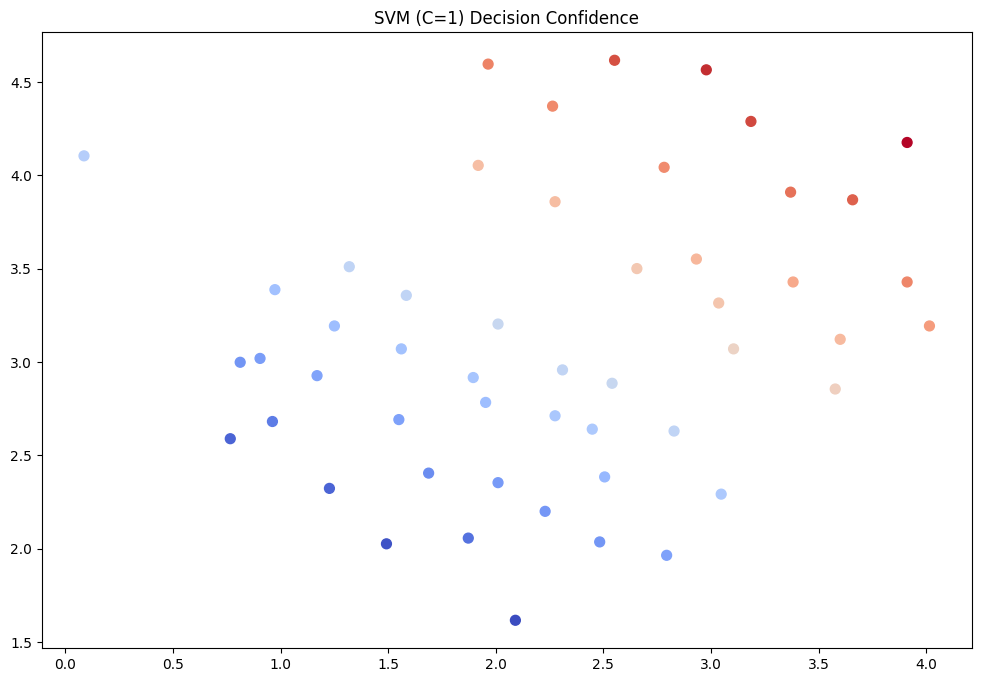

In [20]:
df['SVM 1 Confidence'] = scaled_svm_clf.decision_function(X)  

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df.x1, df.x2, s=50, c=df['SVM 1 Confidence'], cmap='coolwarm')
ax.set_title('SVM (C=1) Decision Confidence')

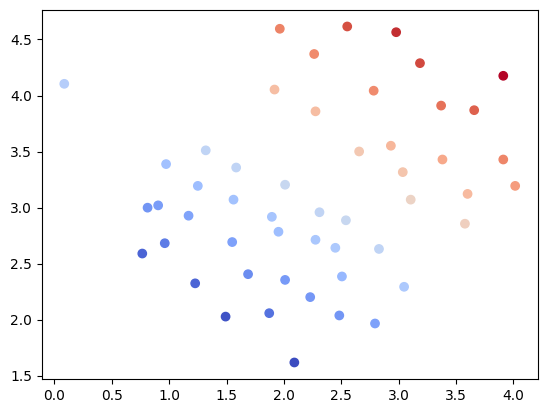

In [24]:
conf = scaled_svm_clf.decision_function(X)
plt.scatter(df.x1, df.x2, c = conf, cmap='coolwarm')

#### 9. Do the same with the second model

https://www.svm-tutorial.com/2015/06/svm-understanding-math-part-3/

Text(0.5, 1.0, 'SVM (C=500) Decision Confidence')

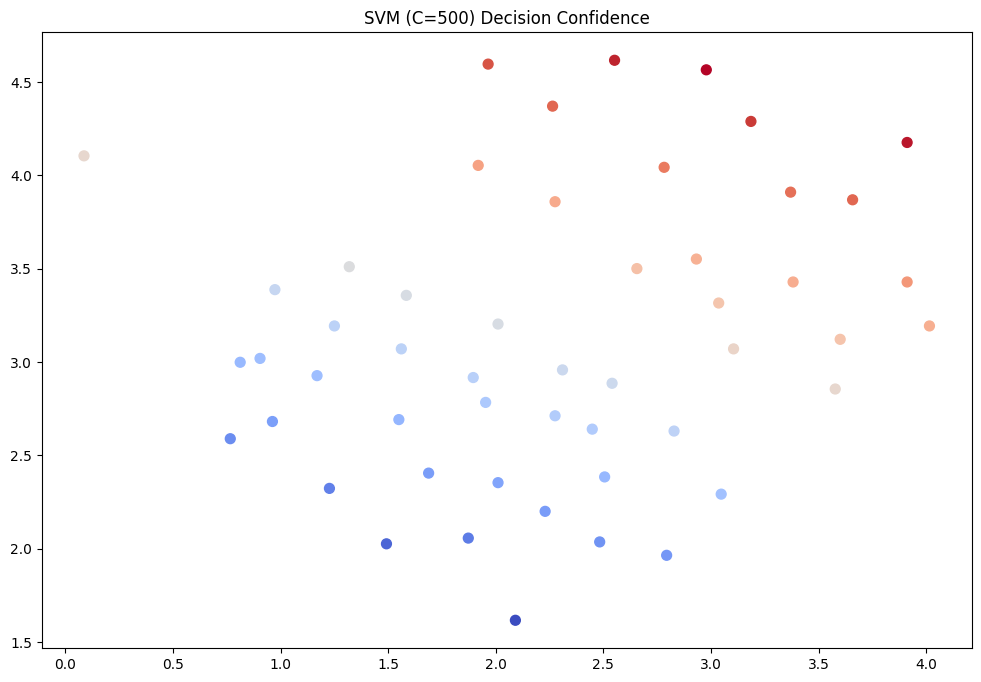

In [27]:
df['SVM 500 Confidence'] = scaled_svm_clf2.decision_function(X)

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df.x1, df.x2, s=50, c=df['SVM 500 Confidence'], cmap='coolwarm')
ax.set_title('SVM (C=500) Decision Confidence')

- mas claros menos peso, mas fuertes mas peso

- c1 - pinta la linea sin mas

- c500 se ajusta tanto que el outlier se pinta ya del otro grupo

y = ax1 + bx2 + c

0 = ax1 + bx2 + c

bx2 = -ax1 - c

x2 = (-a/b)x1 - c/b

se puede pintar la linea pero ojo como he usado Pipeline es una parafernalia

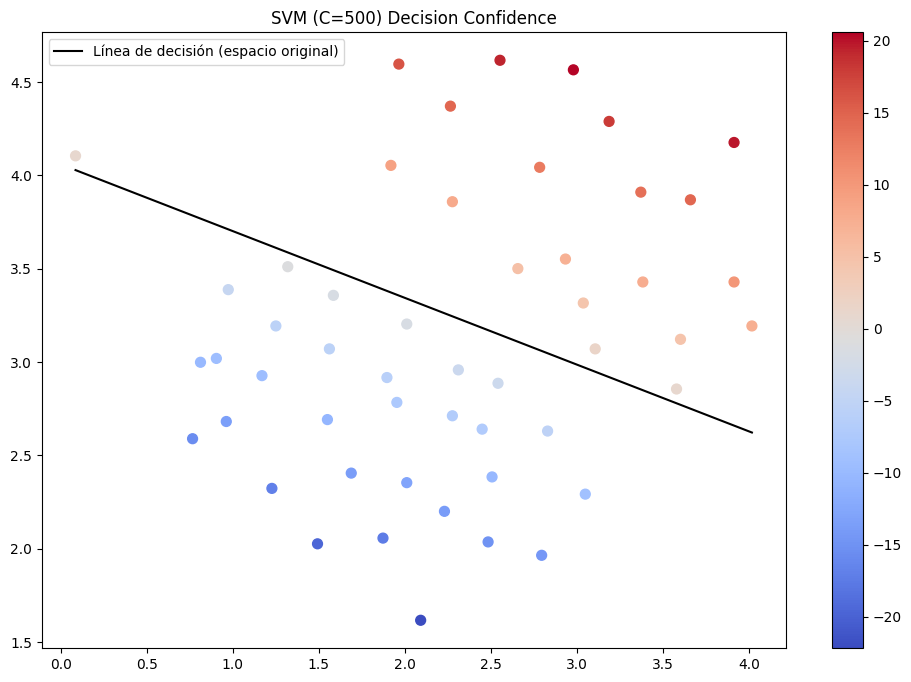

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Acceder al modelo y al StandardScaler dentro del pipeline
svm_model = scaled_svm_clf2.named_steps['linear_svc']
scaler = scaled_svm_clf2.named_steps['scaler']

# Obtener coeficientes y bias en el espacio escalado
w_scaled = svm_model.coef_[0]
b_scaled = svm_model.intercept_[0]

# Desescalar los coeficientes y el bias
w_orig = w_scaled / scaler.scale_
b_orig = b_scaled - np.sum(w_scaled * scaler.mean_ / scaler.scale_)

# Crear línea de decisión en el espacio original
x_vals = np.linspace(df.x1.min(), df.x1.max(), 200)
y_vals = -(w_orig[0] * x_vals + b_orig) / w_orig[1]

# Graficar
fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(df.x1, df.x2, s=50, c=df['SVM 500 Confidence'], cmap='coolwarm')
ax.plot(x_vals, y_vals, 'k-', label='Línea de decisión (espacio original)')
ax.set_title('SVM (C=500) Decision Confidence')
ax.legend()
plt.colorbar(scatter, ax=ax)


Now we're going to move from a linear SVM to one that's capable of non-linear classification using kernels.  We're first tasked with implementing a gaussian kernel function.  Although scikit-learn has a gaussian kernel built in, for transparency we'll implement one from scratch.

## Exercise 2

That result matches the expected value from the exercise.  Next we're going to examine another data set, this time with a non-linear decision boundary.

#### 1. Load the data `ejer_1_data2.mat`

In [37]:
mat = scipy.io.loadmat('./data/ejer_1_data2.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

#### 2. Create a DataFrame with the features and target

In [38]:
data = np.hstack((mat['X'], mat['y']))
df = pd.DataFrame(data, columns= ['x1', 'x2', 'y'])
df.head()

,x1,x2,y
0,0.107143,0.603070,1.0
1,0.093318,0.649854,1.0
2,0.097926,0.705409,1.0
3,0.155530,0.784357,1.0
4,0.210829,0.866228,1.0


#### 3. Plot a scatterplot with the data

<Axes: xlabel='x1', ylabel='x2'>

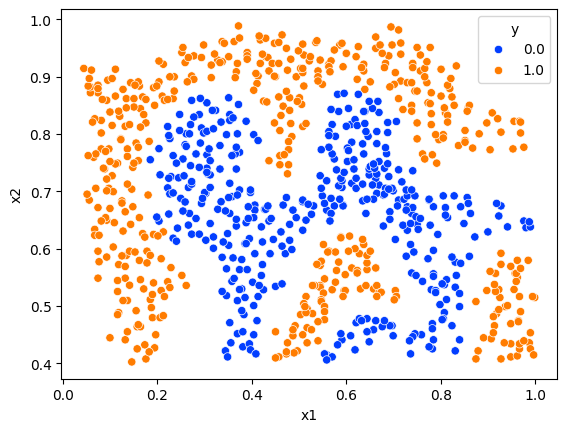

In [39]:
sns.scatterplot(data=df, x=df.x1, y=df.x2, hue='y',palette='bright')

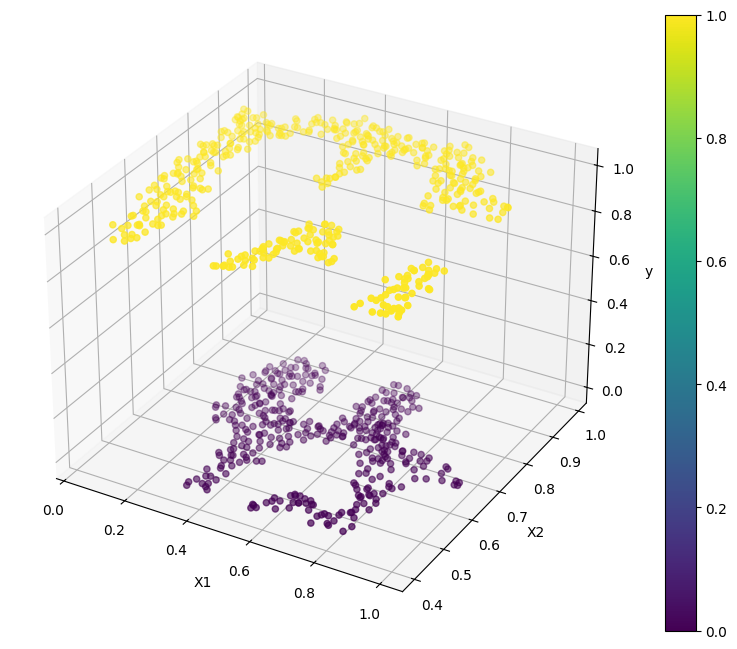

In [40]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(df['x1'], df['x2'], df['y'],
                       c=df['y'],
                       cmap='viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
plt.colorbar(scatter)

For this data set we'll build a support vector machine classifier using the built-in RBF kernel and examine its accuracy on the training data.  To visualize the decision boundary, this time we'll shade the points based on the predicted probability that the instance has a negative class label.  We'll see from the result that it gets most of them right.

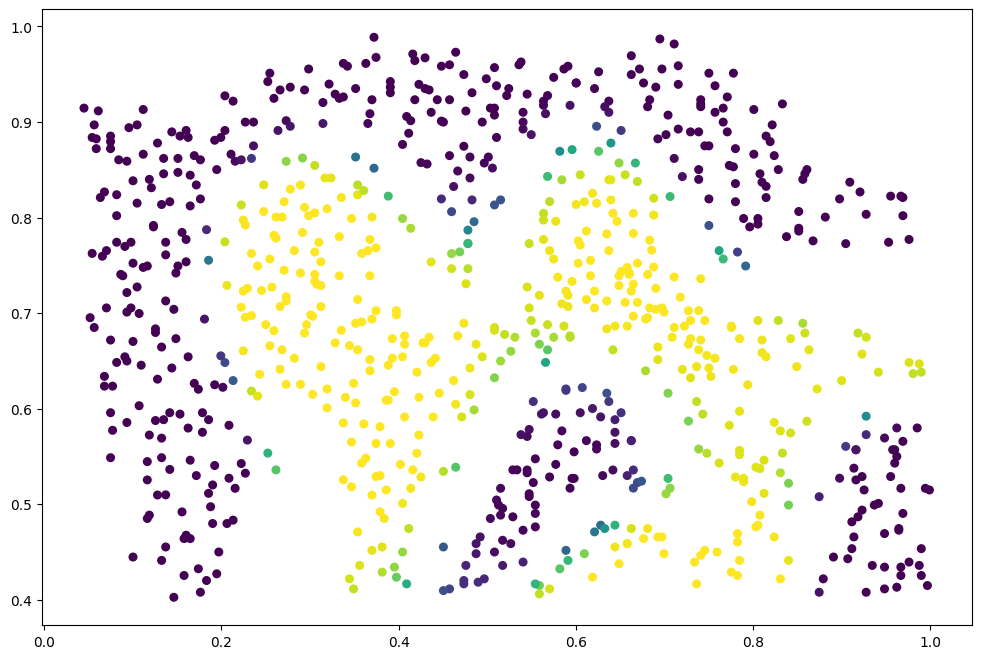

In [ ]:
svc = SVC(C=100, gamma=10, probability=True, random_state=10)
svc.fit(df[['x1', 'x2']], df['y'])


In [44]:
 svc.predict_proba(df[['x1', 'x2']])

array([[3.0000009e-14, 1.0000000e+00],
       [3.0000009e-14, 1.0000000e+00],
       [3.0000009e-14, 1.0000000e+00],
       ...,
       [3.0000009e-14, 1.0000000e+00],
       [3.0000009e-14, 1.0000000e+00],
       [3.0000009e-14, 1.0000000e+00]], shape=(863, 2))

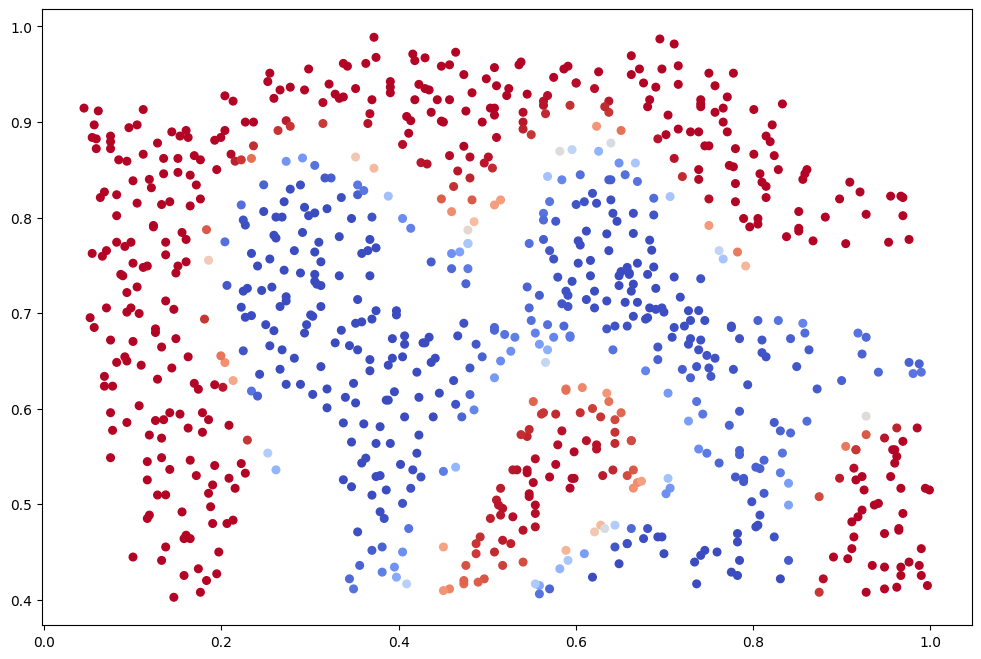

In [46]:
df['Probability'] = svc.predict_proba(df[['x1', 'x2']])[:,1]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(df['x1'], df['x2'], s=30, c=df['Probability'], cmap='coolwarm');

mas oscuros van a tener mas precision, mas claros mas penalizacion mas duda

In [43]:
svc.score(df[['x1', 'x2']], df.y)

0.9698725376593279

#### 4. Declare a SVC with this hyperparameters
```Python
SVC(C=100, gamma=10, probability=True)
```


In [ ]:
#  arriba 3

#### 5. Fit the classifier and get the score

In [ ]:
#  arriba 3

#### 6. Plot the scatter plot and probability of predicting 0 with a [sequential color](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html)

In [ ]:
#  arriba 3